# Linear regression using Normal Equation
theta = {X_tran*X}-1 * X_Tran*y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

[0, 2, 0, 15]

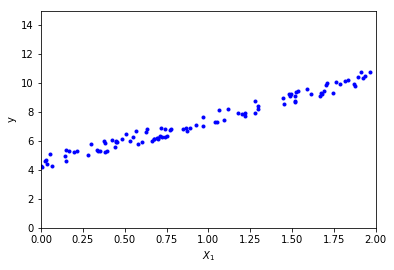

In [2]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.axis([0,2,0,15])

In [9]:
# Normal Equation
X_b = np.c_[np.ones((100,1)),X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[4.61741383],
       [2.89875165]])

In [10]:
#predict
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta)
y_pred

array([[ 4.61741383],
       [10.41491712]])

[0, 2, 0, 15]

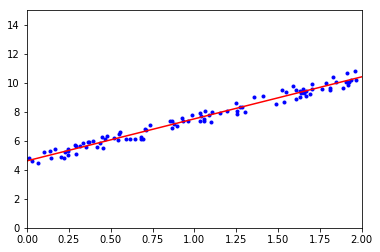

In [11]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-')
plt.axis([0,2,0,15])

In [12]:
# equivalent code in scikit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
pred = lin_reg.predict(X_new)
lin_reg.intercept_, lin_reg.coef_


(array([4.61741383]), array([[2.89875165]]))

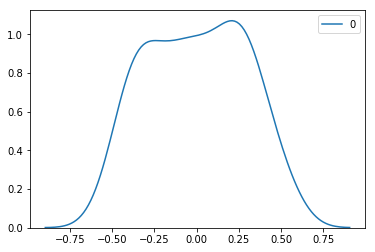

In [13]:
pred1 = lin_reg.predict(X)
sns.kdeplot(pd.DataFrame(y - pred1)[0])

# Batch Gradient descent


In [14]:
eta = 0.1
m =100
n_iteration = 1000
theta = np.random.rand(2,1,)
for iteration in range(n_iteration):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta *gradient

In [15]:
theta

array([[4.61741383],
       [2.89875165]])

In [16]:
X_new_b.dot(theta)

array([[ 4.61741383],
       [10.41491712]])

In [17]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iternation = 1000
    for iteration in range(n_iteration):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

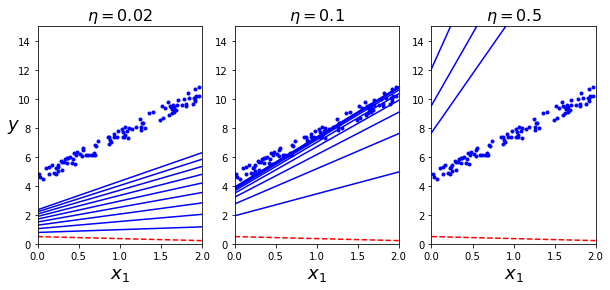

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic gradient descent


[0, 2, 0, 15]

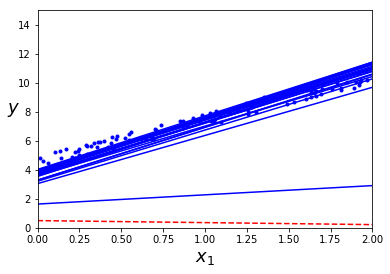

In [19]:
theta_path_sgd = []
np.random.seed(42)
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameter
m = len(X_b)

def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)             
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])   

In [20]:
theta

array([[4.60970327],
       [2.89521325]])

In [21]:
# scikit learn sgd
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, eta0=0.1, penalty=None)
sgd_reg.fit(X,y)
sgd_reg.intercept_, sgd_reg.coef_

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.60951642]), array([2.88864155]))

# Min batch gradient desent


In [22]:
theta_path_mgd = []
t0,t1 = 200,1000
def learning_schedule(t):
    return t0/(t+t1)

minibatch_size = 20
n_iterations = 10

np.random.seed(42)
theta = np.random.randn(2,1)

t = 0
count =0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.6097694 ],
       [2.94761747]])

# Polynomial regression

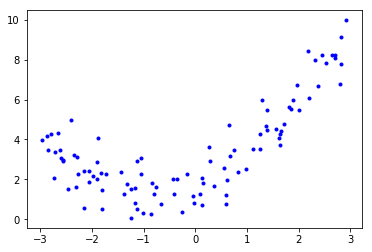

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)
plt.plot(X,y,'b.')

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X)
X_poly[0],X[0]

(array([-0.75275929,  0.56664654]), array([-0.75275929]))

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

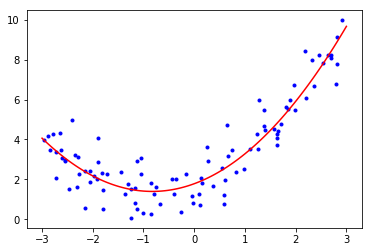

In [27]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_feature.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-')

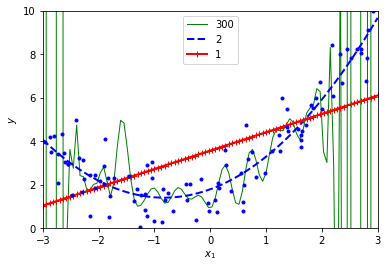

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (('g-',1,300),('b--',2,2),('r-+',2,1)):
    polybig_features = PolynomialFeatures(degree= degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([('polybig_feature',polybig_features),
                        ('std_scaler',std_scaler),
                       ('lin_reg',lin_reg)])
    polynomial_regression.fit(X,y)
    y_pred = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_pred,style,label=str(degree),linewidth=width)
plt.plot(X,y,'b.')
plt.axis([-3, 3, 0, 10])
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()

## Learning curve

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X,y):
    X_train,X_val, y_train, y_val = train_test_split(X, y, test_size =0.2,random_state=10)
    train_error, val_error = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m],y_train_predict))
        val_error.append(mean_squared_error(y_val,y_val_predict))
    plt.figure(figsize=(14,8))
    plt.plot(np.sqrt(train_error),'r-+',label='train',linewidth=2)
    plt.plot(np.sqrt(val_error),'b-',label='val',linewidth=2)
    plt.legend()
    plt.xlabel('# of training examples m')
    plt.ylabel('RMSCE')
   

[0, 80, 0, 3]

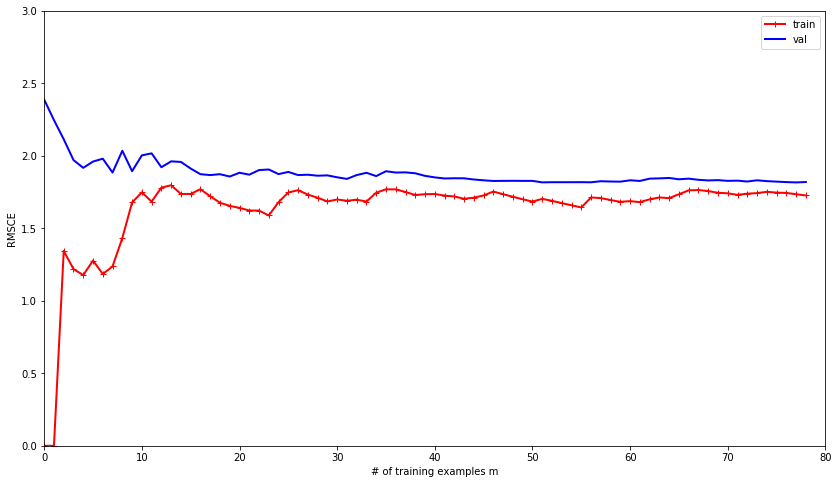

In [30]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0, 80, 0, 3])

Model have high bias

[0, 80, 0, 3]

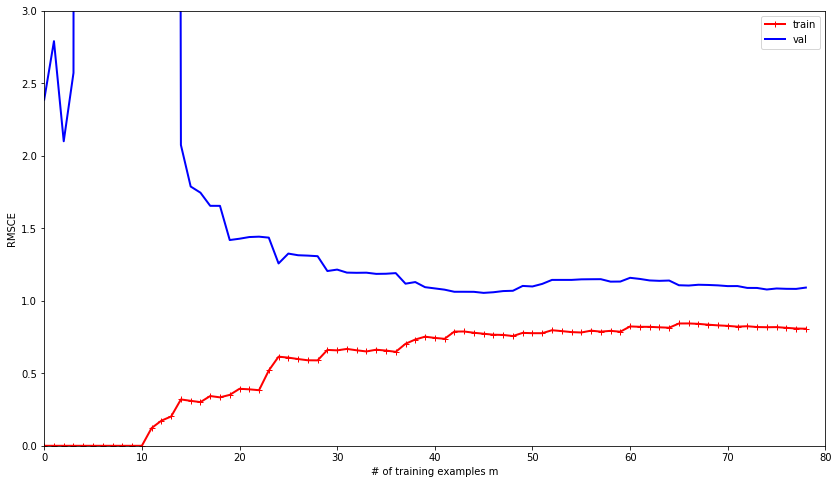

In [31]:
# Addresing underfitting
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10,include_bias=False)),
    ('sgd_reg',LinearRegression())
])

plot_learning_curve(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3])

# Ridge regression

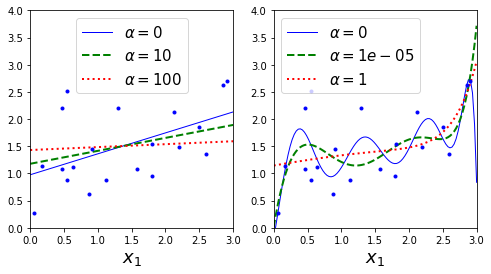

In [32]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)


def plot_model(model_class, polynomial,alphas,**model_kwargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_class(alpha,**model_kwargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('polynomial_feature',PolynomialFeatures(degree=10,include_bias=False)),
                 ('Std_scaler',StandardScaler()),
                 ('regul_reg',model)
                ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha >0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=r'$\alpha ={}$'.format(alpha))
    plt.plot(X,y,'b.',linewidth=3)
    plt.legend(loc='best',fontsize=15)
    plt.xlabel('$x_1$',fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5,1),random_state=42)

In [33]:
seed = 12
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,random_state=seed,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [34]:
## Using stochastic gradient descent
sgd_reg = SGDRegressor(max_iter=5, penalty='l2', random_state=42)
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.13500145])

In [35]:
ridge_reg = Ridge(alpha=1,random_state=42,solver="sag")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### Lasso Regression


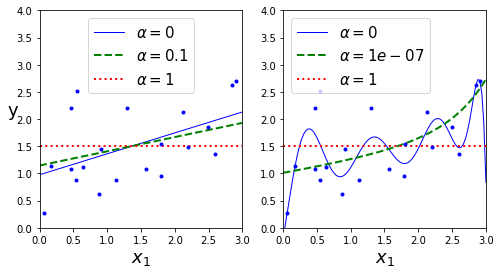

In [38]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel('y',rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7,1),tol=1,random_state=42)


In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
elasso_reg.predict([[1.5]])

array([1.53788174])

In [44]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])